<a href="https://colab.research.google.com/github/madhav7034/Assessment/blob/main/Case_Study_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
test_data = pd.read_csv('/content/Testing_data.csv')
train_data =pd.read_csv('/content/Training_data.csv')

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [23]:
train_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [25]:
train_data.shape

(5634, 21)

In [26]:
test_data.shape

(1409, 21)

In [27]:
train_data.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [28]:
pd.value_counts(train_data['gender'])

/tmp/ipython-input-2346343199.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_data['gender'])


,count
gender,
Male,2744
Female,2721


In [29]:
test_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [30]:
train_data.nunique()

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [31]:

x_train_numerical=train_data.select_dtypes(include=['int64','float64'])
x_test_numerical =test_data.select_dtypes(include=['int64','float64'])
x_test_categorical= test_data.select_dtypes(include='object')
x_train_categorical =train_data.select_dtypes(include='object')

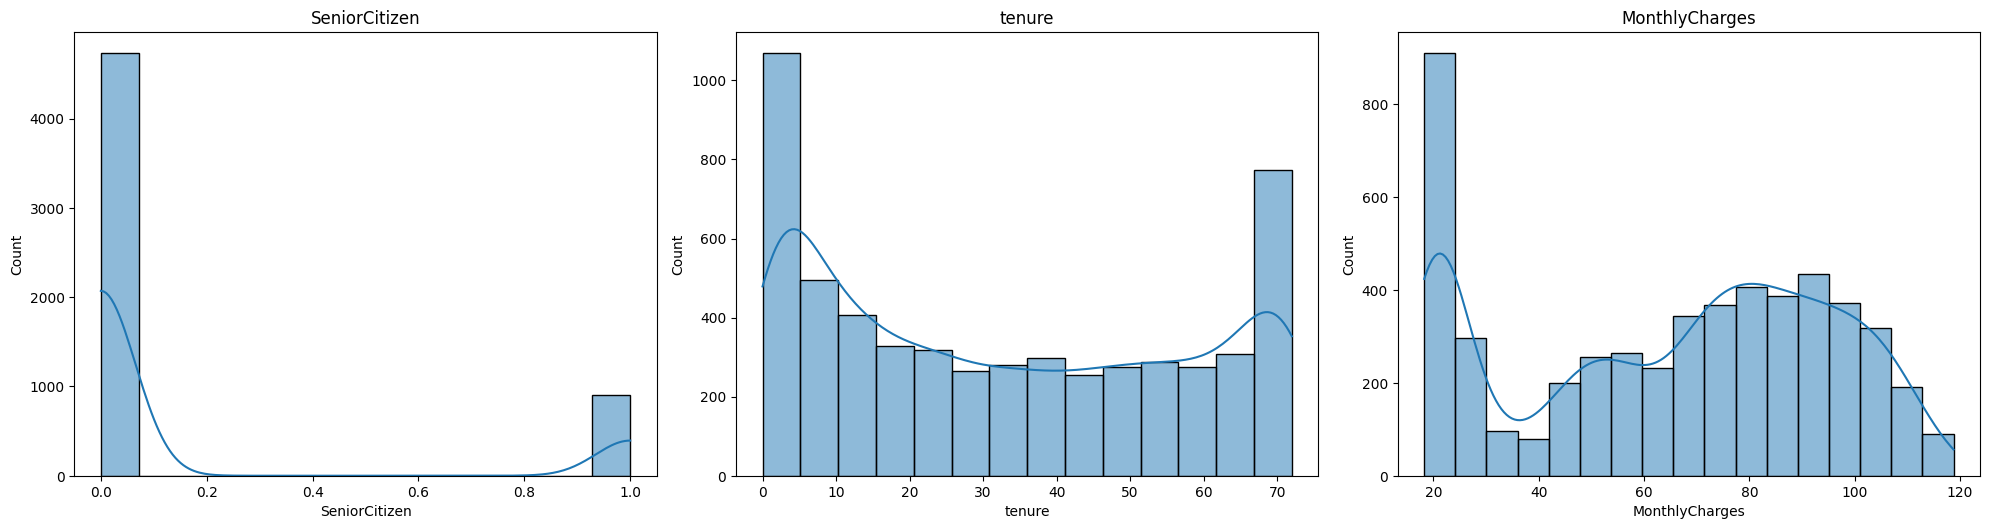

In [32]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(x_train_numerical.columns):
  plt.subplot(3, 3, i + 1)
  sns.histplot(data=x_train_numerical, x=col, kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

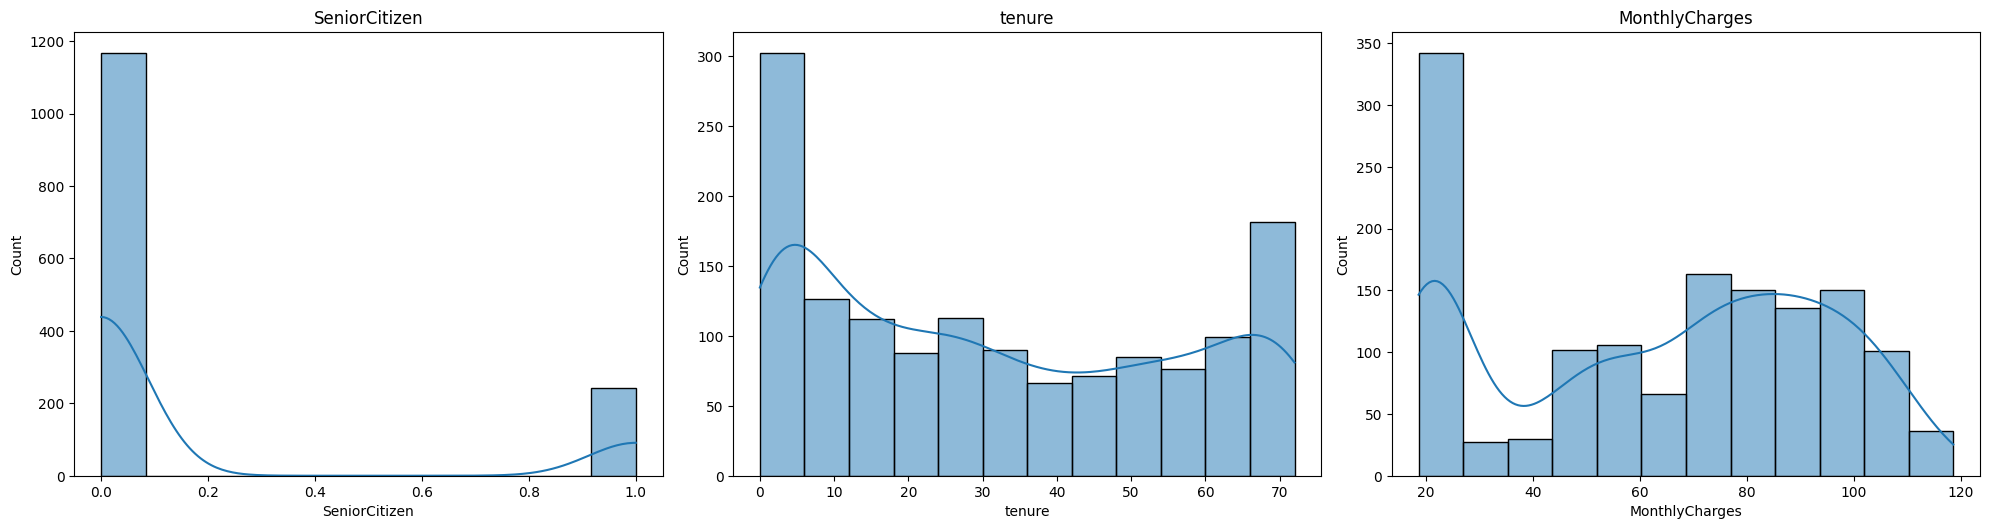

In [33]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(x_test_numerical.columns):
 plt.subplot(3, 3, i + 1)
 sns.histplot(data=x_test_numerical, x=col, kde=True)
 plt.title(col)
plt.tight_layout()
plt.show()

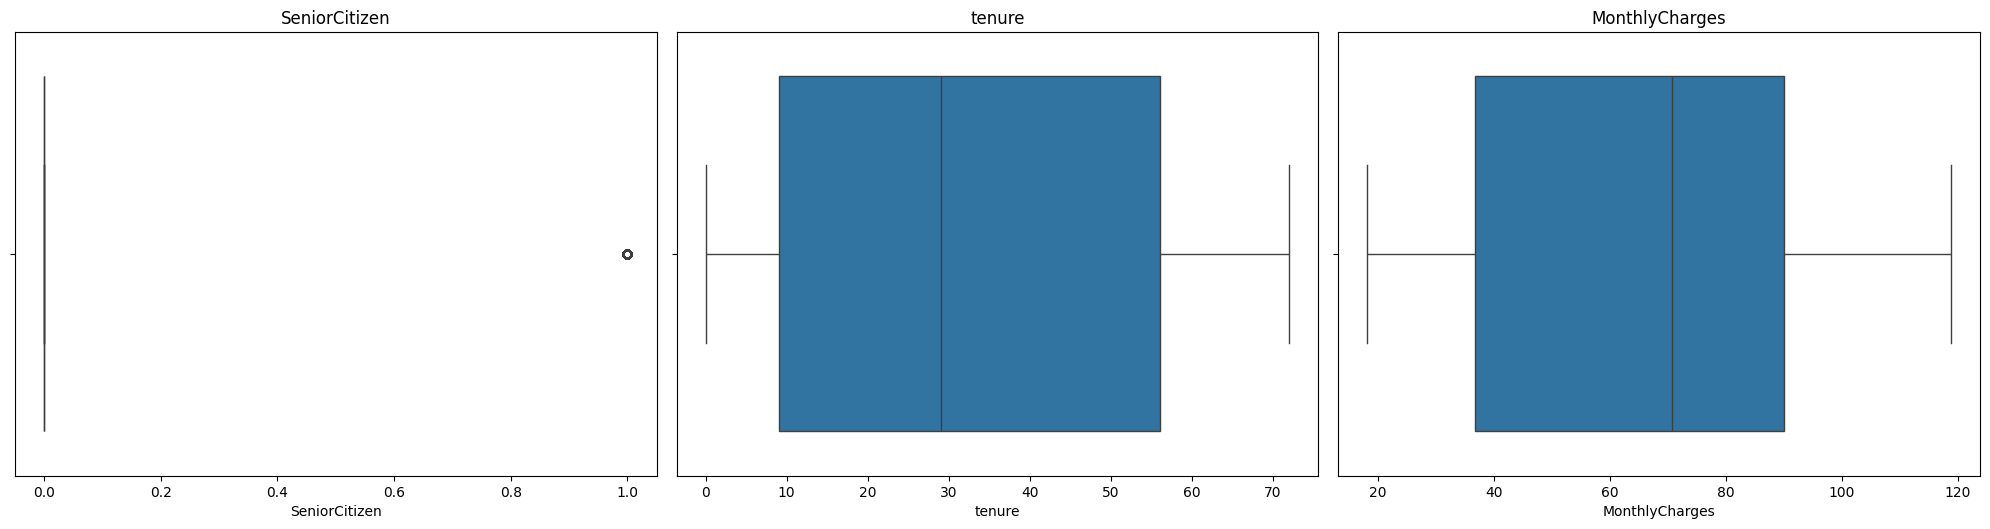

In [34]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(x_train_numerical.columns):
 plt.subplot(3, 3, i + 1)
 sns.boxplot(data=x_train_numerical, x=col)
 plt.title(col)
plt.tight_layout()
plt.show()

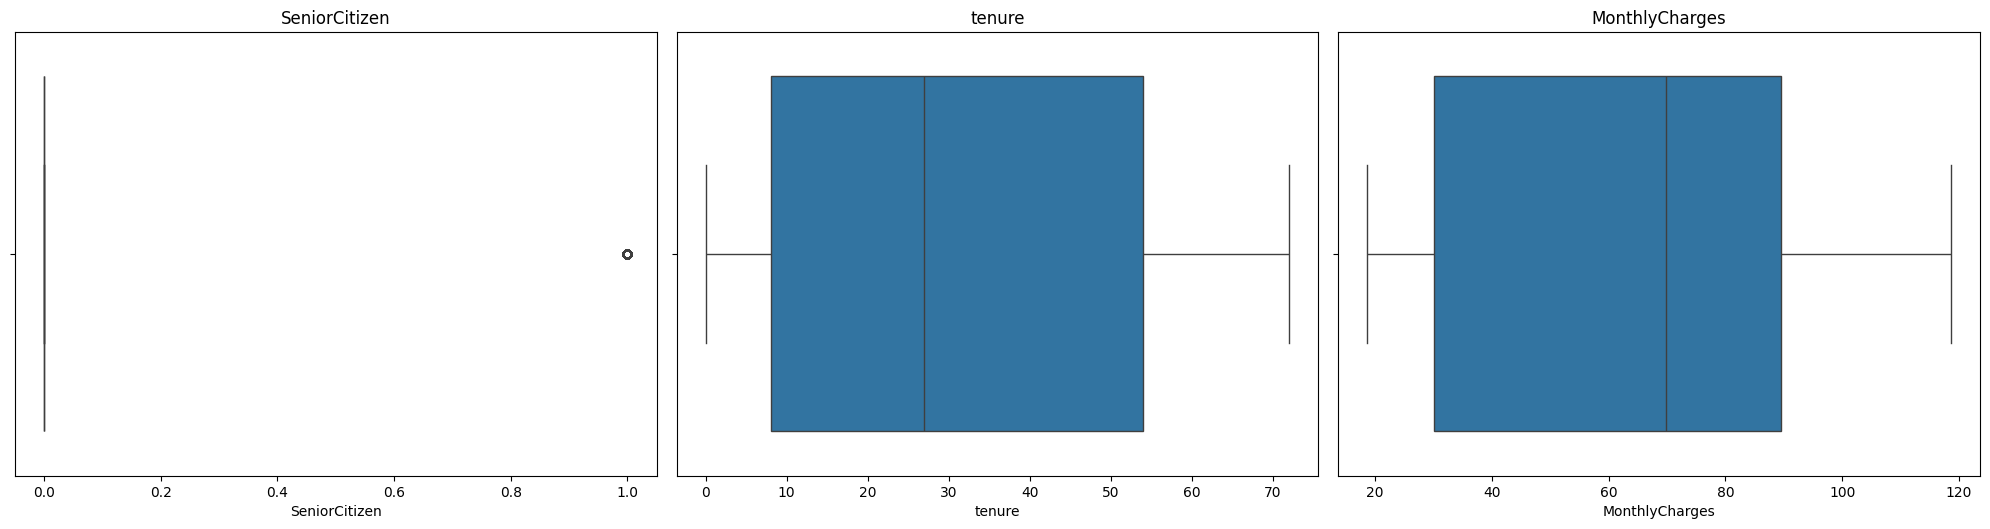

In [35]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(x_test_numerical.columns):
 plt.subplot(3, 3, i + 1)
 sns.boxplot(data=x_test_numerical, x=col)
 plt.title(col)
plt.tight_layout()
plt.show()

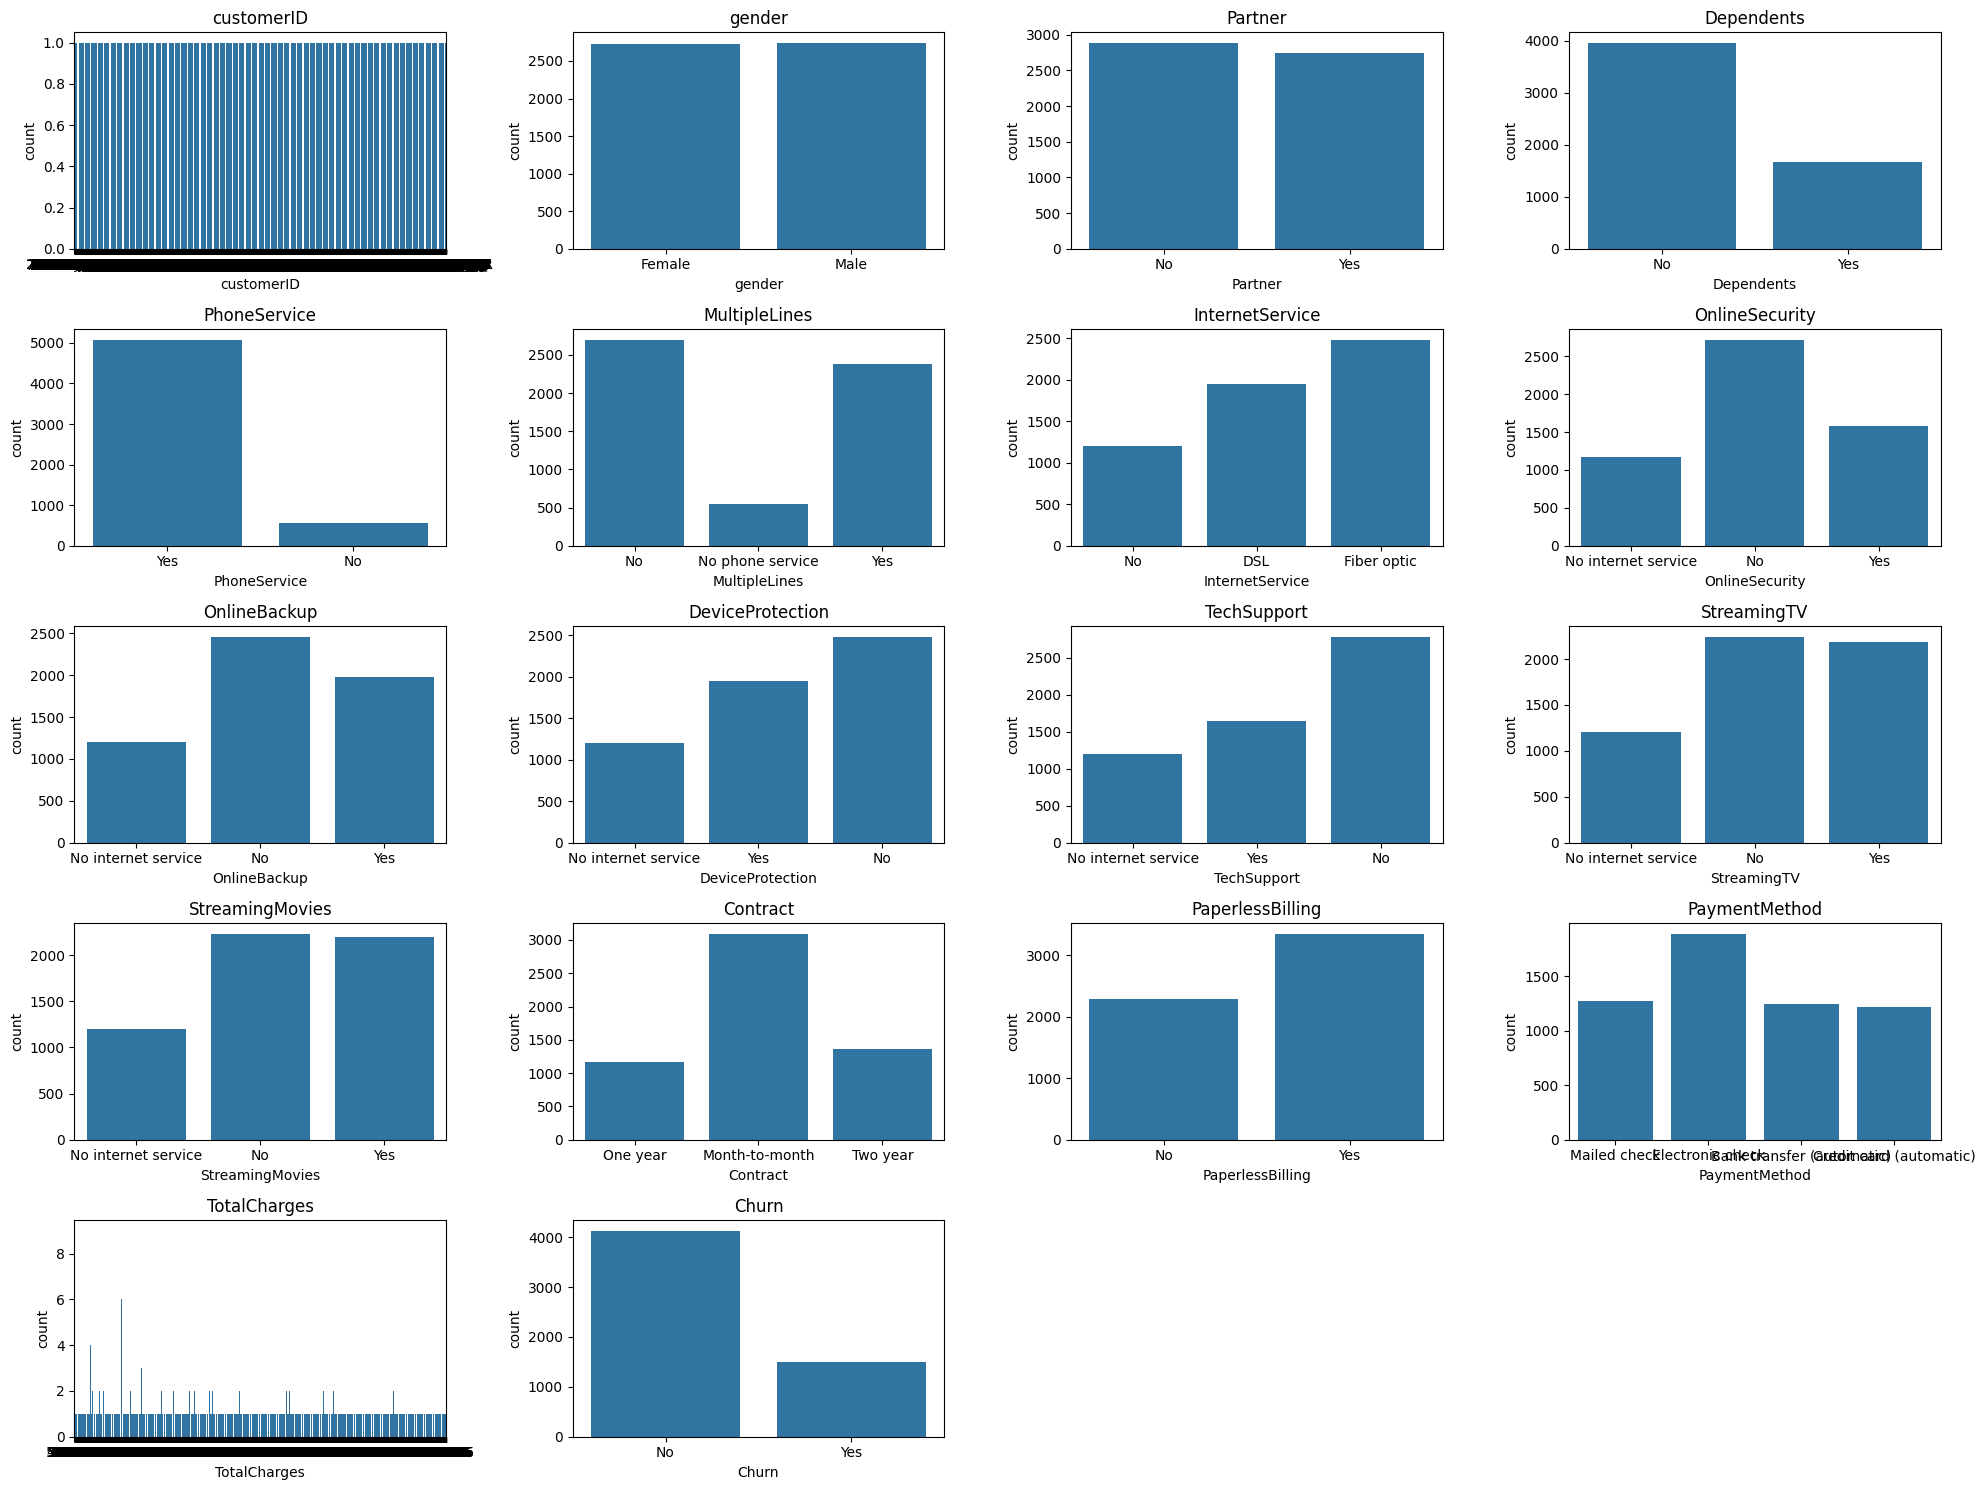

In [36]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(x_train_categorical):
 plt.subplot(5, 4, i + 1)
 sns.countplot(data=x_train_categorical, x=col)
 plt.title(col)
plt.tight_layout()
plt.show()

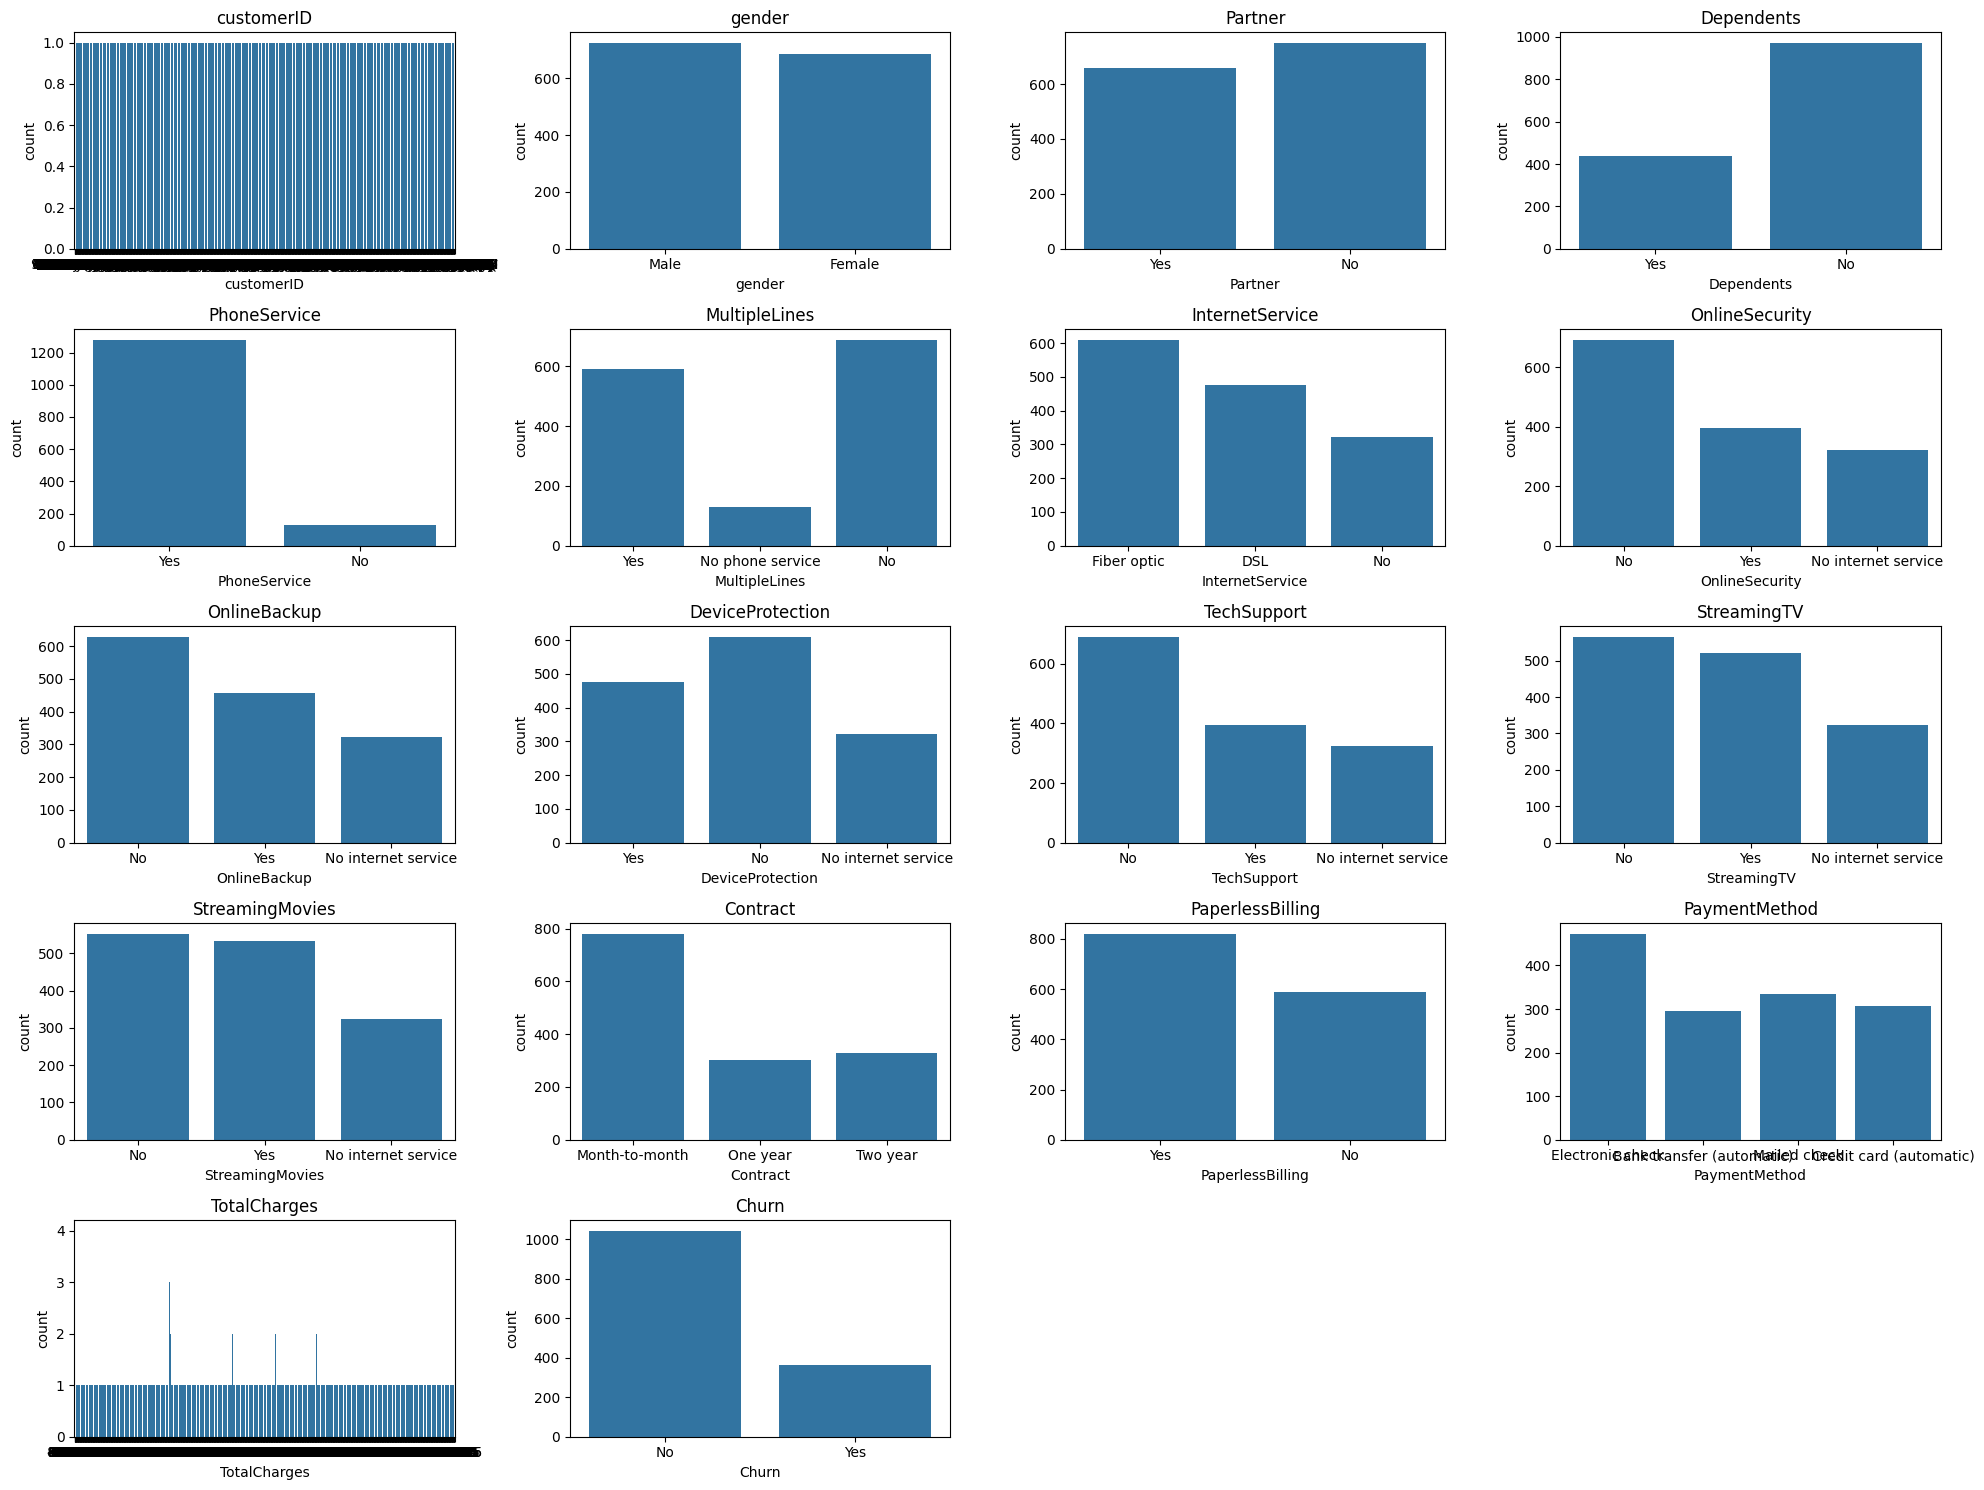

In [38]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(x_test_categorical):
 plt.subplot(5, 4, i + 1)
 sns.countplot(data=x_test_categorical, x=col)
 plt.title(col)
plt.tight_layout()
plt.show()

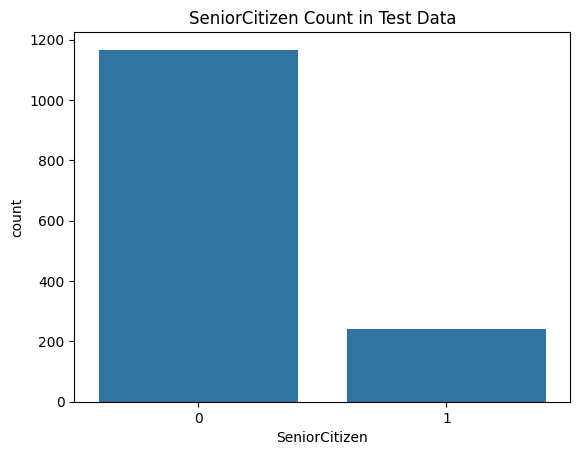

In [39]:
sns.countplot(data=x_test_numerical, x='SeniorCitizen')
plt.title('SeniorCitizen Count in Test Data')
plt.show()

In [40]:
pd.value_counts(train_data['InternetService'])

/tmp/ipython-input-1838381867.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_data['InternetService'])


,count
InternetService,
Fiber optic,2486
DSL,1945
No,1203


In [41]:
pd.value_counts(train_data['OnlineBackup'])


/tmp/ipython-input-3380702000.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_data['OnlineBackup'])


,count
OnlineBackup,
No,2459
Yes,1972
No internet service,1203


In [42]:
pd.value_counts(train_data['OnlineSecurity'])

/tmp/ipython-input-3134856322.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_data['OnlineSecurity'])


,count
OnlineSecurity,
No,2720
Yes,1574
No internet service,1171


In [43]:
train_data.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [45]:
train_data['gender']=train_data['gender'].fillna(train_data['gender'].mode()[0])

In [46]:
train_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [47]:
train_data.loc[train_data['OnlineSecurity'].isna()& (train_data['InternetService']=='No'),'OnlineSecurity'] ='No internet service'

In [48]:
import random

online_security_options = ['Yes', 'No']
train_data['OnlineSecurity'] = train_data['OnlineSecurity'].fillna( random.choice(online_security_options) )

print(train_data.isna().sum())

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      394
TotalCharges        281
Churn                 0
dtype: int64


In [49]:
test_data['TotalCharges']=test_data['TotalCharges'].replace(' ', np.nan)

In [51]:
from sklearn.impute import SimpleImputer

train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')
imputer = SimpleImputer(strategy='median')
total_charges_reshaped = train_data['TotalCharges'].values.reshape(-1, 1)
train_data['TotalCharges'] = imputer.fit_transform(total_charges_reshaped)
print(train_data['TotalCharges'].isna().sum())

0


In [52]:
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')
imputer = SimpleImputer(strategy='median')
test_data['TotalCharges'] = imputer.fit_transform(test_data[['TotalCharges']])

In [53]:
test_data['MonthlyCharges'] = pd.to_numeric(test_data['MonthlyCharges'], errors='coerce')
imputer = SimpleImputer(strategy='median')
test_data['MonthlyCharges'] = imputer.fit_transform(test_data[['MonthlyCharges']])

In [54]:
train_data['MonthlyCharges'] = pd.to_numeric(train_data['MonthlyCharges'], errors='coerce')
imputer = SimpleImputer(strategy='median')
train_data['MonthlyCharges'] = imputer.fit_transform(train_data[['MonthlyCharges']])

In [55]:
train_data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [56]:
pd.value_counts(train_data['OnlineSecurity'])

/tmp/ipython-input-3134856322.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_data['OnlineSecurity'])


,count
OnlineSecurity,
No,2720
Yes,1711
No internet service,1203


In [57]:
train_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']] = train_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']].replace('No internet service', 'No')

In [58]:
test_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']] = test_data[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']].replace('No internet service', 'No')

In [59]:
train_data['MultipleLines'] = train_data['MultipleLines'].replace('No phone service', 'No')

In [60]:
test_data['MultipleLines'] = test_data['MultipleLines'].replace('No phone service', 'No')

In [61]:
train_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No,...,No,No,No,No,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No,DSL,Yes,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No
5,7048-GXDAY,Male,0,No,No,39,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,4040.65,No
6,4697-LUPSU,Male,0,Yes,Yes,2,Yes,No,No,No,...,No,No,No,No,One year,No,Mailed check,20.20,34.75,No
7,2432-TFSMK,Male,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),89.60,1633.00,No
8,2027-WKXMW,Female,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.75,6871.70,No
9,4826-TZEVA,Female,0,No,No,40,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),74.80,1396.45,No


In [62]:
y_train = train_data['Churn']
x_train = train_data.drop(['Churn','customerID'], axis=1)
y_test = test_data['Churn']
x_test = test_data.drop(['Churn','customerID'], axis=1)

In [63]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [64]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,No,35,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.75,700.45
1,Female,0,No,No,28,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05
3,Male,0,Yes,No,39,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.45,790.00
4,Female,0,Yes,Yes,43,No,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15
5630,Male,1,Yes,No,68,No,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75
5631,Male,0,Yes,Yes,72,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),19.95,1322.85
5632,Female,0,No,No,69,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.30


In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 


In [66]:
x_train_cat=x_train.select_dtypes(include='object')
x_train_cat
x_train_num =x_train.select_dtypes(include=['float64','int64'])
x_test_cat =x_test.select_dtypes(include='object')

In [67]:
for i in x_train_cat.columns:
  x_train[i]=label_enc.fit_transform(x_train[i])

In [68]:
for i in x_test_cat.columns:
  x_test[i]=label_enc.fit_transform(x_test[i])

In [69]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,35,1,0,2,0,0,0,0,0,0,1,0,3,20.75,700.45
1,0,0,0,0,28,0,0,0,0,0,1,1,0,0,0,1,3,35.75,961.40
2,1,0,0,0,56,1,1,1,0,1,0,0,1,1,0,0,2,98.60,5581.05
3,1,0,1,0,39,1,0,2,0,0,0,0,0,0,2,1,0,20.45,790.00
4,0,0,1,1,43,0,0,0,1,1,0,1,1,0,1,1,0,51.25,2151.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,0,0,0,51,1,0,1,0,1,1,0,1,1,0,1,2,99.00,5038.15
5630,1,1,1,0,68,0,0,0,1,1,1,0,0,0,2,1,2,41.95,2965.75
5631,1,0,1,1,72,1,0,2,0,0,0,0,0,0,2,0,0,19.95,1322.85
5632,0,0,0,0,69,1,0,0,1,0,1,1,1,1,2,1,1,82.45,5555.30


In [70]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,40,1,1,1,0,0,1,0,0,0,0,1,2,81.20,3292.30
1,0,0,1,0,12,1,1,0,1,0,1,0,1,1,1,0,2,78.85,876.75
2,1,0,0,0,43,1,1,1,0,0,0,1,1,1,1,1,2,100.00,4211.55
3,1,0,0,0,72,1,1,1,1,1,1,1,1,1,2,1,2,118.20,8547.15
4,0,0,0,0,10,0,0,0,0,1,0,1,0,0,0,0,2,36.25,374.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,0,0,0,27,1,0,0,1,1,0,0,0,0,1,0,0,55.45,1477.65
1405,0,1,0,0,2,1,1,1,0,0,0,0,0,0,0,1,3,75.45,158.40
1406,0,0,1,0,3,1,1,1,0,0,0,0,0,0,0,1,1,75.15,216.75
1407,1,0,1,1,53,1,0,2,0,0,0,0,0,0,1,0,1,20.20,1068.15


In [71]:
y_test = label_enc.fit_transform(y_test)
y_train = label_enc.fit_transform(y_train)

In [72]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
from scipy.stats import skew


In [74]:
skewness = x_train_num.skew
skewness()

,0
SeniorCitizen,1.857943
tenure,0.227944
MonthlyCharges,-0.283808
TotalCharges,1.039322


In [75]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [76]:
std_scalar = StandardScaler()

In [77]:
power_scaler = PowerTransformer()

In [78]:
x_train[['tenure','MonthlyCharges']] = std_scalar.fit_transform(x_train[['tenure','MonthlyCharges']])

In [79]:
x_test[['tenure','MonthlyCharges']] = std_scalar.transform(x_test[['tenure','MonthlyCharges']])

In [80]:

x_train['TotalCharges'] = power_scaler.fit_transform(x_train[['TotalCharges']])

In [81]:
x_test['TotalCharges'] = power_scaler.transform(x_test[['TotalCharges']])

In [82]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

metric_k =[]
neighbors=np.arange(3,50)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  metric_k.append(acc)

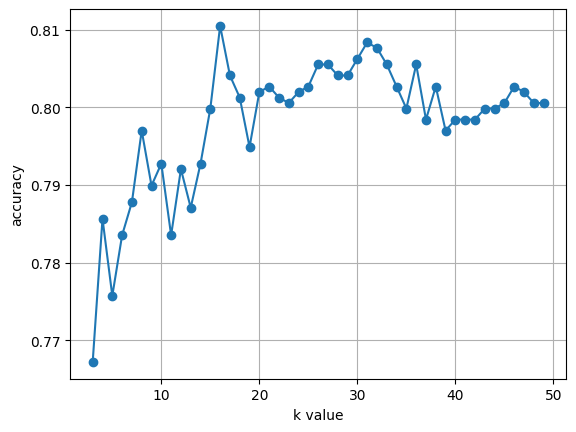

In [83]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [84]:
classifier = KNeighborsClassifier(n_neighbors=31, metric='minkowski', p=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [85]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.808374733853797
Precision:  0.8034458984274429
Recall:  0.808374733853797
f1 score:  0.8054284060335029


In [86]:
from sklearn.neighbors import RadiusNeighborsClassifier

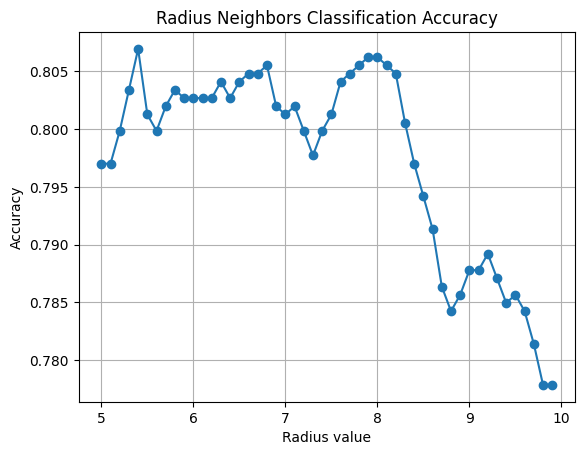

In [87]:
metric_r = []
radii = np.arange(5,10,0.1)

for r in radii:
     classifier = RadiusNeighborsClassifier(radius=r, weights='distance', metric='minkowski', p=1, outlier_label=-1)
     classifier.fit(x_train, y_train)
     y_pred = classifier.predict(x_test)
     acc = accuracy_score(y_test, y_pred)
     metric_r.append(acc)

plt.plot(radii, metric_r, 'o-')
plt.xlabel('Radius value')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Radius Neighbors Classification Accuracy')
plt.show()

In [88]:
classifier3 = RadiusNeighborsClassifier(radius=5.4, metric='minkowski', p=1, outlier_label=-1)
classifier3.fit(x_train, y_train)
y_pred3 = classifier3.predict(x_test)

print("Accuracy score is", accuracy_score(y_test, y_pred3))
print("Precision score is", precision_score(y_test, y_pred3,average='weighted'))
print("Recall score is", recall_score(y_test, y_pred3,average='weighted'))
print("F1 score is", f1_score(y_test, y_pred3,average='weighted'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Accuracy score is 0.8119233498935415
Precision score is 0.8043848453419407
Recall score is 0.8119233498935415
F1 score is 0.8066744572959039
Confusion Matrix:
[[939 105]
 [160 205]]


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import  classification_report

Accuracy: 0.7892122072391767
Confusion Matrix:
 [[960  84]
 [213 152]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1044
           1       0.64      0.42      0.51       365

    accuracy                           0.79      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409



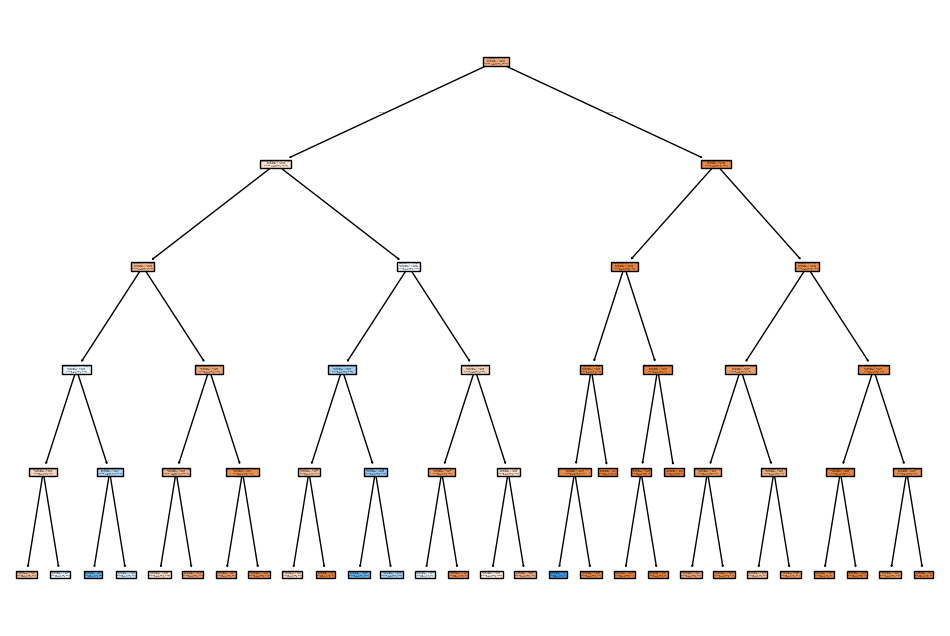

In [90]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
class_labels = sorted(set(y_train))

plt.figure(figsize=(12, 8))
tree.plot_tree(clf,
               feature_names=x_train.columns,  # if x_train is a DataFrame
               class_names=[str(label) for label in class_labels],
               filled=True)
plt.show()



In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( n_estimators=100,
    criterion='gini',
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

In [92]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)


print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.7920511000709723
Precision:  0.7814853911644087
Recall:  0.7920511000709723
f1 score:  0.7845235143242975


In [93]:
from sklearn.model_selection import  GridSearchCV ,RandomizedSearchCV

In [94]:

model = KNeighborsClassifier()



param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_jobs': [-1]
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1 )



grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Cross-Validated Score: 0.77635716886183


In [95]:

model_knn = KNeighborsClassifier()


param_dist_knn = {
    'n_neighbors': np.arange(3, 50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(20, 50),
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}


random_search_knn = RandomizedSearchCV(
    estimator=model_knn,
    param_distributions=param_dist_knn,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search_knn.fit(x_train, y_train)


print("Best Parameters for KNN:", random_search_knn.best_params_)
print("Best Cross-Validated Score for KNN:", random_search_knn.best_score_)


best_knn_model = random_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(x_test)
print("Test set accuracy for KNN:", accuracy_score(y_test, y_pred_knn))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for KNN: {'weights': 'uniform', 'p': 2, 'n_neighbors': np.int64(32), 'metric': 'manhattan', 'leaf_size': np.int64(34), 'algorithm': 'brute'}
Best Cross-Validated Score for KNN: 0.7981900737745093
Test set accuracy for KNN: 0.8076650106458482


In [96]:

param_grid = {
    'radius': [0.5, 1.0, 1.5, 2.0],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'outlier_label': ['most_frequent', None],
    'n_jobs': [-1]
}



rnn = RadiusNeighborsClassifier(outlier_label=-1)

grid_search = GridSearchCV(rnn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best radius: ", grid_search.best_params_['radius'])
print("Best cross-validation accuracy: ", grid_search.best_score_)

best_rnn = grid_search.best_estimator_
y_pred = best_rnn.predict(x_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

Streaming output truncated to the last 5000 lines.
        794,  795,  796,  797,  799,  800,  805,  806,  809,  810,  813,
        814,  815,  816,  817,  818,  819,  820,  821,  823,  824,  825,
        828,  829,  830,  832,  833,  834,  836,  837,  840,  841,  842,
        843,  845,  846,  847,  848,  849,  850,  851,  852,  853,  854,
        855,  856,  857,  859,  860,  861,  862,  866,  868,  869,  873,
        874,  875,  876,  877,  878,  879,  880,  882,  883,  885,  886,
        887,  889,  891,  893,  896,  897,  900,  901,  902,  904,  905,
        907,  908,  909,  910,  911,  912,  913,  915,  917,  918,  921,
        923,  924,  925,  927,  928,  929,  932,  933,  934,  935,  936,
        937,  938,  939,  940,  942,  943,  944,  945,  946,  947,  950,
        951,  952,  953,  954,  955,  958,  959,  960,  961,  962,  964,
        965,  966,  969,  970,  971,  973,  974,  975,  976,  978,  979,
        980,  981,  984,  985,  988,  990,  991,  993,  995,  996,  997,


Best radius:  2.0
Best cross-validation accuracy:  0.7907339783546441
Test set accuracy:  0.7955997161107168


In [97]:

model_rnn = RadiusNeighborsClassifier(outlier_label=-1)


param_dist_rnn = {
    'radius': np.arange(0.5, 10, 0.5),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': np.arange(20, 50),
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_jobs': [-1]
}


random_search_rnn = RandomizedSearchCV(
    estimator=model_rnn,
    param_distributions=param_dist_rnn,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search_rnn.fit(x_train, y_train)


print("Best Parameters for RadiusNeighborsClassifier:", random_search_rnn.best_params_)
print("Best Cross-Validated Score for RadiusNeighborsClassifier:", random_search_rnn.best_score_)


best_rnn_model = random_search_rnn.best_estimator_
y_pred_rnn = best_rnn_model.predict(x_test)
print("Test set accuracy for RadiusNeighborsClassifier:", accuracy_score(y_test, y_pred_rnn))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for RadiusNeighborsClassifier: {'weights': 'uniform', 'radius': np.float64(4.5), 'p': 2, 'n_jobs': -1, 'metric': 'manhattan', 'leaf_size': np.int64(33), 'algorithm': 'kd_tree'}
Best Cross-Validated Score for RadiusNeighborsClassifier: 0.7964149780693806
Test set accuracy for RadiusNeighborsClassifier: 0.794180269694819


In [98]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(x_train, y_train)

print("Best max_depth: ", grid_search.best_params_['max_depth'])
print("Best cross-validation accuracy: ", grid_search.best_score_)

best_rnn = grid_search.best_estimator_
y_pred = best_rnn.predict(x_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))

Best max_depth:  5
Best cross-validation accuracy:  0.784877565204783
Test set accuracy:  0.7693399574166075


In [99]:

model_dt = DecisionTreeClassifier(random_state=42)

param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': list(np.arange(2, 20, 2)),
    'min_samples_leaf': list(np.arange(1, 10, 1)),
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}


random_search_dt = RandomizedSearchCV(
    estimator=model_dt,
    param_distributions=param_dist_dt,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search_dt.fit(x_train, y_train)

print("Best Parameters for Decision Tree:", random_search_dt.best_params_)
print("Best Cross-Validated Score for Decision Tree:", random_search_dt.best_score_)

best_dt_model = random_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(x_test)
print("Test set accuracy for Decision Tree:", accuracy_score(y_test, y_pred_dt))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Decision Tree: {'splitter': 'best', 'min_samples_split': np.int64(12), 'min_samples_leaf': np.int64(4), 'max_features': None, 'max_depth': np.int64(5), 'criterion': 'entropy'}
Best Cross-Validated Score for Decision Tree: 0.7898469821166555
Test set accuracy for Decision Tree: 0.7892122072391767


In [100]:

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


grid_search_rf.fit(x_train, y_train)

print("Best Parameters for RandomForestClassifier: ", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy for RandomForestClassifier: ", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)
print("Test set accuracy for RandomForestClassifier: ", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters for RandomForestClassifier:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy for RandomForestClassifier:  0.8015640637288198
Test set accuracy for RandomForestClassifier:  0.8019872249822569


In [101]:

model_rf = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

random_search_rf = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_dist_rf,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(x_train, y_train)


print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Cross-Validated Score for Random Forest:", random_search_rf.best_score_)

best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)
print("Test set accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Random Forest: {'n_estimators': np.int64(130), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(3), 'max_features': 'log2', 'max_depth': np.int64(10), 'criterion': 'entropy', 'bootstrap': True}
Best Cross-Validated Score for Random Forest: 0.7994329402160123
Test set accuracy for Random Forest: 0.8055358410220014
